In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

In [72]:
data = pd.read_csv("../data/nyt1.csv")
data

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458436,0,0,2,0,0
458437,0,0,4,0,0
458438,72,1,5,0,1
458439,0,0,5,0,0


In [73]:
data.Age.unique()

array([ 36,  73,  30,  49,  47,   0,  46,  16,  52,  21,  57,  31,  40,
        38,  59,  61,  48,  29,  19,  23,  66,  44,  32,  22,  74,  65,
        63,  35,  33,  34,  43,  18,  17,  62,  27,  11,  42,  41,  14,
        64,  24,  26,  39,  71,  45,  28,  83,  79,  67,  51,  60,  58,
        53,  25,  50,  76,  15,  78,  55,  37,  56,  77,  85,  82,  13,
        70,  84,  54,  20,  10,  81,  68,  72,  69,  87,  80,  88,  12,
        86,  75,  89,   9,  96, 102,  98,  90,  99,  91,  92,  95,   8,
        94,  93,  97,   7, 100, 103, 107, 101, 108, 104], dtype=int64)

In [74]:
data.isnull().sum()

Age            0
Gender         0
Impressions    0
Clicks         0
Signed_In      0
dtype: int64

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458441 entries, 0 to 458440
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Age          458441 non-null  int64
 1   Gender       458441 non-null  int64
 2   Impressions  458441 non-null  int64
 3   Clicks       458441 non-null  int64
 4   Signed_In    458441 non-null  int64
dtypes: int64(5)
memory usage: 17.5 MB


In [76]:
data[data.Age == 0].groupby("Age").count()

,Gender,Impressions,Clicks,Signed_In
Age,,,,
0,137106,137106,137106,137106


<AxesSubplot:>

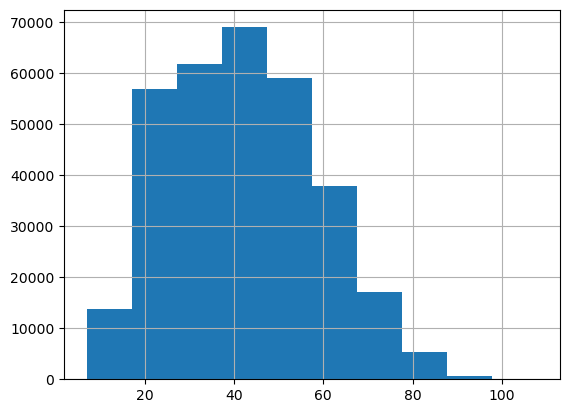

In [77]:
data_no_null_age = data[data.Age > 0]
data_no_null_age.Age.hist()

In [78]:
def extract_age_group(age):
    match age:
        case x if x < 18:
            return "0-18"
        case x if 18 <= x <= 24:
            return "18-24"
        case x if 25 <= x <= 34:
            return "25-34"
        case x if 35 <= x <= 44:
            return "35-44"
        case x if 45 <= x <= 54:
            return "45-54"
        case x if 55 <= x <= 64:
            return "55-64"
        case x if x >= 65:
            return "65+"


data_no_null_age['AgeGroup'] = data_no_null_age.Age.apply(lambda row: extract_age_group(row))
data_by_groups = data_no_null_age.groupby('AgeGroup', as_index=False).count()
data_by_groups

C:\Users\misha\AppData\Local\Temp\ipykernel_43816\1271565994.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_null_age['AgeGroup'] = data_no_null_age.Age.apply(lambda row: extract_age_group(row))


,AgeGroup,Age,Gender,Impressions,Clicks,Signed_In
0,0-18,13828,13828,13828,13828,13828
1,18-24,40694,40694,40694,40694,40694
2,25-34,58174,58174,58174,58174,58174
3,35-44,70860,70860,70860,70860,70860
4,45-54,64288,64288,64288,64288,64288
5,55-64,44738,44738,44738,44738,44738
6,65+,28753,28753,28753,28753,28753


In [94]:
data_by_gender_and_age = data_no_null_age.groupby(['AgeGroup', 'Gender'], as_index=False).count()
data_by_signed_in_and_age = data_no_null_age.groupby(['AgeGroup', 'Signed_In'], as_index=False).count()
data_no_null_age.Signed_In.unique()

array([1], dtype=int64)

<AxesSubplot:xlabel='AgeGroup', ylabel='Clicks'>

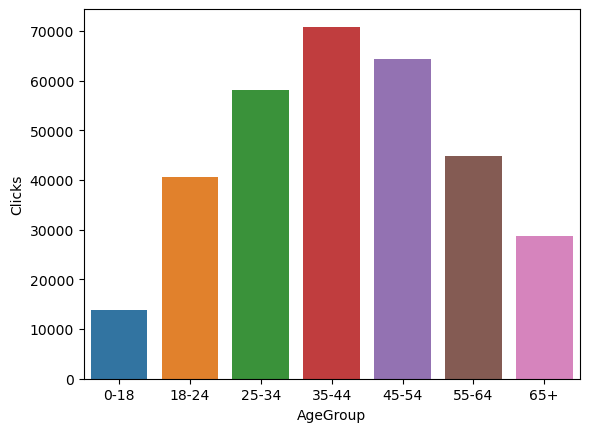

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111)
seaborn.barplot(data=data_by_groups, x=data_by_groups.AgeGroup, y=data_by_groups.Clicks)

<AxesSubplot:xlabel='AgeGroup', ylabel='Clicks'>

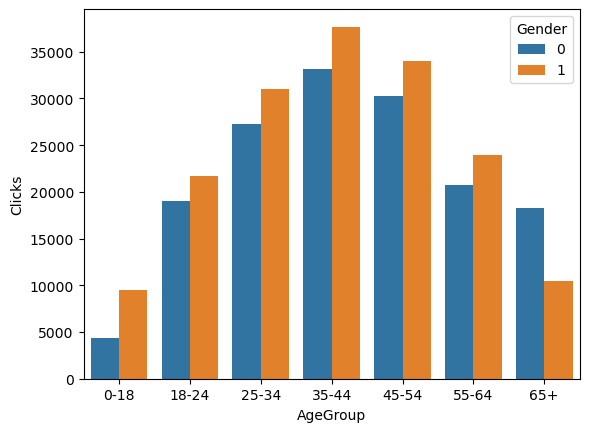

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)
seaborn.barplot(data=data_by_gender_and_age,
                x=data_by_gender_and_age.AgeGroup,
                y=data_by_gender_and_age.Clicks,
                hue=data_by_gender_and_age.Gender)

<AxesSubplot:xlabel='AgeGroup', ylabel='Clicks'>

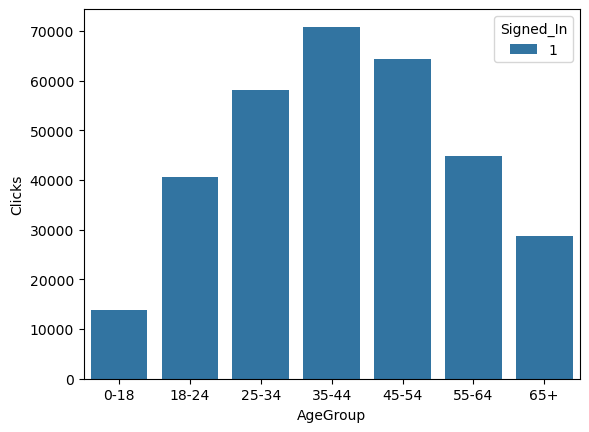

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)
seaborn.barplot(data=data_by_signed_in_and_age,
                x=data_by_signed_in_and_age.AgeGroup,
                y=data_by_signed_in_and_age.Clicks,
                hue=data_by_signed_in_and_age.Signed_In)

In [107]:
# data_ctr = data_by_groups.apply(lambda row: row.Clicks / row.Impressions)
data_by_groups

,AgeGroup,Age,Gender,Impressions,Clicks,Signed_In
0,0-18,13828,13828,13828,13828,13828
1,18-24,40694,40694,40694,40694,40694
2,25-34,58174,58174,58174,58174,58174
3,35-44,70860,70860,70860,70860,70860
4,45-54,64288,64288,64288,64288,64288
5,55-64,44738,44738,44738,44738,44738
6,65+,28753,28753,28753,28753,28753
